# LIBS

In [1]:
from sklearn.linear_model import SGDClassifier
## Scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

## Librerias para graficación
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK es una librería particular para PLN. Tiene muchas funcionalidades entre ellas stemming y lista de palabras de parada.
import nltk
from nltk.corpus import stopwords
import re
import pandas as pd

stemmer = nltk.stem.SnowballStemmer('english') # Vamos a utlizar el Snowball Stemmer para realizar stemming (nos permite llevar las palabras a una forma estandar).
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pms_l\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# DATASET

In [2]:
df = pd.read_csv('train.csv', sep=',', header=0, index_col= None, engine='python',
                 usecols=['text','emotion'])

# CLASSIFIERS

In [4]:
'''
* processing_text
* @param texto str
* @return processed_feature str
'''
def processing_text(texto):
    # Paso 1: Remover con un expresión regular carateres especiales (no palabras).
    processed_feature = re.sub(r'\W', ' ', str(texto))
    # Paso 2: Remover ocurrencias de caracteres individuales
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    # Paso 3: Remover números (Ocurrencias muy esporádicas en nuestro dataset)
    processed_feature = re.sub(r'[0-9]+', ' ', processed_feature)
    # Paso 4: Simplificar espacios concecutivos a un único espacio entre palabras
    processed_feature = re.sub(' +', ' ', processed_feature)
    # Paso 5: Pasar todo el texto a minúsculas
    processed_feature = processed_feature.lower()
    # Paso 6: Aplicar stemming. Es una forma de enviar las palabras a una raiz común simplificando de esta manera el vocabulario.
    #         por ejemplo las palabras (absurdo, absurdos) que estan en el review 2895 seran llevados a la raiz común "absurd"
    #         y de esta forma se evita tener dos palabras diferentes con el mismo significado en nuestro vocabulario.
    processed_feature = " ".join([stemmer.stem(i) for i in processed_feature.split()])


    return processed_feature

Procesamiento de texto: No contemple números, pase a minúscula, elimine caracteres individuales,
tokenize por palabra, y aplique stemming.


In [5]:
# Primero vamos extraer del dataframe la columna texto y la polaridad y las almacenaremos en las variables
# texto_para_procesar y labels respectivamente
texto_para_procesar = (df['text'].values)
labels = df['emotion'].values

# El texto ya procesado de cada ejemplo en nuestro dataset lo almacenaremos en la variable "texto_procesado"
texto_procesado = []
for sentence in range(0, len(texto_para_procesar)):
    procesado = processing_text(texto_para_procesar[sentence])
    texto_procesado.append(procesado)

Funcion del modelo

In [6]:
def create_model(texto_features, model, eta=0.1):
    # Partición del dataset: Seleccionar 80% para entrenamiento, 20% pruebas.
    X_train, X_test, y_train, y_test = train_test_split(
        texto_features, labels, test_size=0.2, random_state=0)

    # Modelo: Naive Bayes | SDGClassifier
    if model == "naives":
        model = MultinomialNB()
        model.fit(X_train, y_train)
    else:
        model = SGDClassifier(
            loss='log_loss', learning_rate='constant', eta0=eta)
        model.fit(X_train, y_train)

    # Reporte de clasificación
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions, digits=4))
    
    accuracy = accuracy_score(y_test, predictions)
	
    # Matriz de confusión
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

    return model,accuracy

## CLASSIFIERS (NB)

### CLASSIFIER 1

Representación: Bolsa de palabras con un vocabulario de 500 tokens, eliminando stop
words(ingles).

              precision    recall  f1-score   support

           0     0.9093    0.8644    0.8863     24055
           1     0.8836    0.9228    0.9028     26853

    accuracy                         0.8952     50908
   macro avg     0.8965    0.8936    0.8945     50908
weighted avg     0.8958    0.8952    0.8950     50908



MultinomialNB()

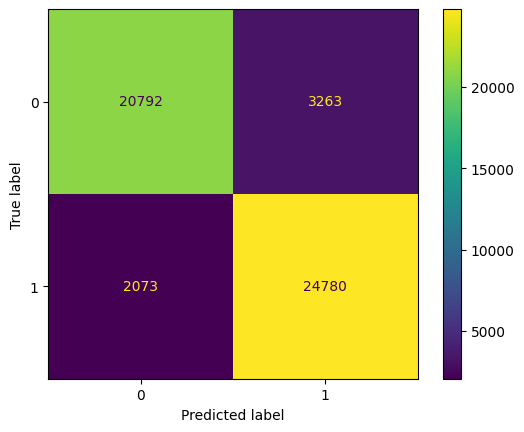

In [6]:
# Bolsa de palabras
vectorizer = CountVectorizer(max_features=500, stop_words=stopwords.words('english'))

# Ahora le solicitamos utilizando nuestro conjunto de datos que construya el vocabulario y tambien transforme nuestro texto
texto_features = vectorizer.fit_transform(texto_procesado).toarray().astype("float16")

# Creamos el modelo y sus metricas
create_model(texto_features, "naives")

### CLASSIFIER 2

Representación: Bolsa de palabras con un vocabulario de 1000 tokens, eliminando stop
words(ingles)

              precision    recall  f1-score   support

           0     0.9320    0.9087    0.9202     24055
           1     0.9200    0.9406    0.9302     26853

    accuracy                         0.9255     50908
   macro avg     0.9260    0.9247    0.9252     50908
weighted avg     0.9257    0.9255    0.9255     50908



MultinomialNB()

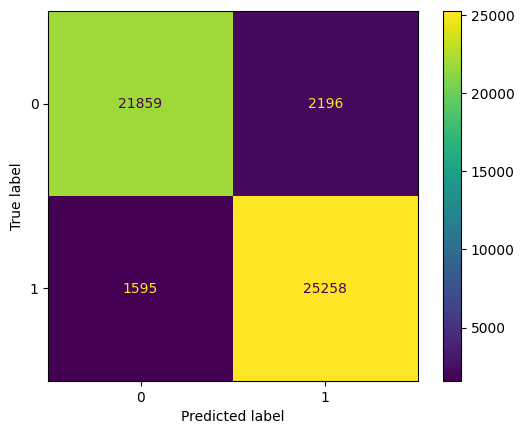

In [7]:
# Bolsa de palabras
vectorizer = CountVectorizer(max_features=1000, stop_words=stopwords.words('english'))

# Ahora le solicitamos utilizando nuestro conjunto de datos que construya el vocabulario y tambien transforme nuestro texto
texto_features = vectorizer.fit_transform(texto_procesado).toarray().astype("float16")

# Creamos el modelo y sus metricas
create_model(texto_features, "naives")

### CLASSIFIER 3

Representación: Bolsa de palabras con un vocabulario de 5000 tokens, eliminando stop
words(ingles).

              precision    recall  f1-score   support

           0     0.9310    0.9219    0.9264     24055
           1     0.9306    0.9388    0.9347     26853

    accuracy                         0.9308     50908
   macro avg     0.9308    0.9303    0.9306     50908
weighted avg     0.9308    0.9308    0.9308     50908



MultinomialNB()

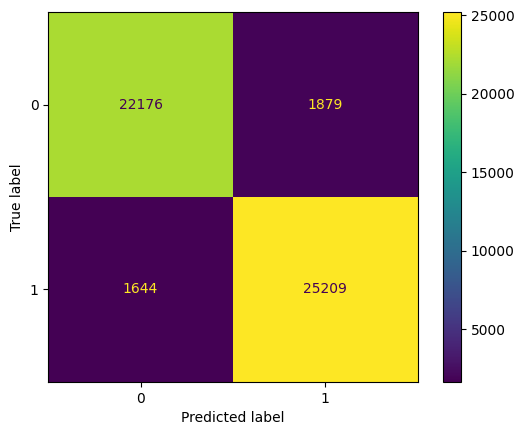

In [8]:
# Bolsa de palabras
vectorizer = CountVectorizer(max_features=5000, stop_words=stopwords.words('english'))

# Ahora le solicitamos utilizando nuestro conjunto de datos que construya el vocabulario y tambien transforme nuestro texto
texto_features = vectorizer.fit_transform(texto_procesado).toarray().astype("float16")

# Creamos el modelo y sus metricas
create_model(texto_features, "naives")

## CLASSFIER (SDG)

### CLASSIFIER 4


              precision    recall  f1-score   support

           0     0.8976    0.9649    0.9301     24055
           1     0.9663    0.9014    0.9327     26853

    accuracy                         0.9314     50908
   macro avg     0.9320    0.9332    0.9314     50908
weighted avg     0.9339    0.9314    0.9315     50908



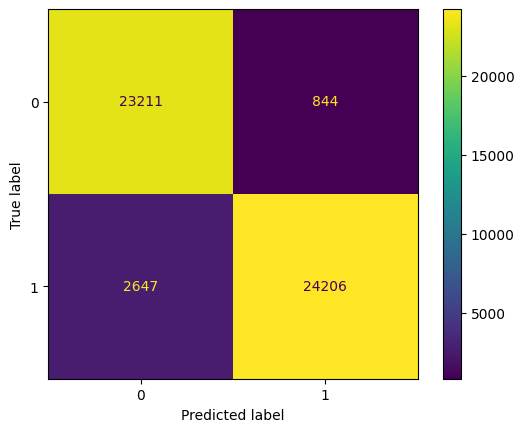

In [7]:
# Bolsa de palabras
vectorizer = CountVectorizer(max_features=5000, stop_words=stopwords.words('english'))

# Ahora le solicitamos utilizando nuestro conjunto de datos que construya el vocabulario y tambien transforme nuestro texto
texto_features = vectorizer.fit_transform(texto_procesado).toarray().astype("float16")

# Creamos el modelo y sus metricas
model_words,_ = create_model(texto_features, "sdg", eta=0.1)

### CLASSIFIER 5

              precision    recall  f1-score   support

           0     0.6717    0.1815    0.2858     24055
           1     0.5566    0.9205    0.6938     26853

    accuracy                         0.5713     50908
   macro avg     0.6142    0.5510    0.4898     50908
weighted avg     0.6110    0.5713    0.5010     50908



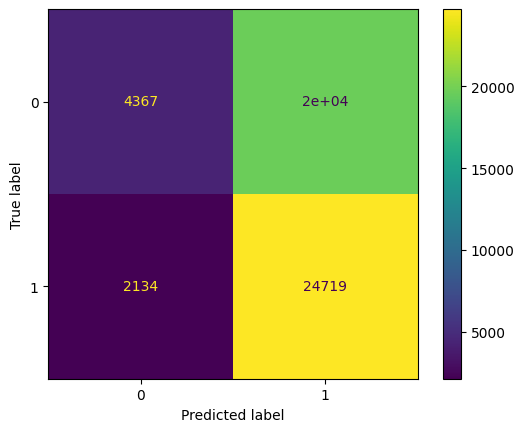

In [10]:
# Bolsa de palabras
vectorizer = CountVectorizer(max_features=5000, stop_words=stopwords.words('english'))

# Ahora le solicitamos utilizando nuestro conjunto de datos que construya el vocabulario y tambien transforme nuestro texto
texto_features = vectorizer.fit_transform(texto_procesado).toarray().astype("float16")

# Creamos el modelo y sus metricas
create_model(texto_features, "sdg", eta=100)

# RESPUESTAS

## ¿Qué efecto sobre el F1-score y el accuracy tiene el incremento del vocabulario?, es bueno o negativo incrementarlo?

rpta:  `El incremento del vocabulario tuvo cambios positivos en cuanto al porcentaje de f1-score y el accuracy incrementandolo de 89. a 93., sin embargo, hubieron problemas relacionados con la ram al momento de generar la matriz de features para los vocabularios de 5000 palabras, esto se resolvio cambiando el tipo dato para las matrices de float64 a float16`

## ¿En base a los resultados del clasificador SGDClassifier y experimentación adicional que realice, para este problema que valor de la tasa de aprendizaje es apropiado?, ¿Vale la pena incrementarlo como en el clasificador 5?


Hallando la tasa de aprendizaje apropiado

In [15]:
# Bolsa de palabras
vectorizer = CountVectorizer(max_features=5000, stop_words=stopwords.words('english'))

# Ahora le solicitamos utilizando nuestro conjunto de datos que construya el vocabulario y tambien transforme nuestro texto
texto_features = vectorizer.fit_transform(texto_procesado).toarray().astype("float16")

In [ ]:
tasa_acc = None
eta = 0.1
accuracy = 0
for i in range(10):
    _,acc = create_model(texto_features, "sdg", eta=eta)
    if acc >= accuracy:
        accuracy = acc
        tasa_acc = eta
    eta += 0.1

In [21]:
print(f"{tasa_acc} - {accuracy}")

0.1 - 0.9335860768445038


rpta: `Luego de realizar las pruebas cambiando e incrementando la tasa de aprendizaje, obtuve que el mejor resultado es asignandole un valor de 0.1, ya que al incrementar esa tasa el accuracy como el f1-score van disminuyendo`

## Los coeficientes que se obtienen del SGD son un indicativo de importancia de características. ¿Utilizando el clasificador 4, cuáles son las palabras más relevantes (importantes) para la tarea de clasificación?

In [13]:
def top_words(palabras, coefs):
    words = []
    for i in range(len(coefs)):
        words.append((palabras[i],coefs[i]))

    positives = sorted(words, key=lambda x: (x[1]),reverse = True)
    negatives = sorted(words, key=lambda x: (x[1]),reverse = False)
    return positives,negatives
positives,negatives = top_words(vectorizer.get_feature_names_out(),model_words.coef_[0])
top_words = positives[:5] + negatives[:5]

In [14]:
top_words = sorted(top_words, key=lambda x: ( abs(x[1])),reverse = True)
top_words


[('rotten', -3.356852240127491),
 ('lame', -3.304501426756164),
 ('letharg', -3.2758884575276945),
 ('vain', -3.2693767357492978),
 ('lousi', -3.251438302199221),
 ('innoc', 2.9577099615618963),
 ('superior', 2.8418244061974995),
 ('intellig', 2.813979063945992),
 ('divin', 2.6735148983772303),
 ('belov', 2.6559489683955655)]

rpta: `Tras crear un touple donde guardamos la palabra con su coeficiente (peso|W), le realizamos los ordenamientos en base a su coeficiente y podemos observar las palabras mas importantes tanto negativas como positivas son las siguientes :`

`
	[('rotten'),
	('lame'),
	('letharg'),
	('vain'),
	('lousi'),
	('innoc'),
	('superior'),
	('intellig'),
	('divin'),
	('belov')]
`